# Assignment 4


## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('model.csv')

In [2]:
df.head(3)

,id,duration,codec,width,height,bitrate,category,framerate,i,p,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,1,645.84000,vp8,320,240,95903,People & Blogs,25.032558,138,16008,...,6660941,0,7742262,vp8,109000,29.97,1280,720,218932,15.929
1,2,326.58832,h264,1920,1080,5999648,People & Blogs,23.000000,174,7656,...,228322925,0,244926878,flv,820000,29.97,1920,1080,218932,10.417
2,3,473.00000,h264,320,240,164017,Sports,25.000000,198,10924,...,8047423,0,9697521,h264,242000,24.00,1920,1080,645544,45.327


In [3]:
#check dupplcates
df[df.duplicated(keep=False)]

,id,duration,codec,width,height,bitrate,category,framerate,i,p,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime


In [4]:
#check nulls
df.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
category       0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

In [5]:
#primary cleaning - remve id
df=df.drop(columns=['id'])

## Split categorical/continuous variables

In [6]:
df.dtypes

duration       float64
codec           object
width            int64
height           int64
bitrate          int64
category        object
framerate      float64
i                int64
p                int64
b                int64
frames           int64
i_size           int64
p_size           int64
b_size           int64
size             int64
o_codec         object
o_bitrate        int64
o_framerate    float64
o_width          int64
o_height         int64
umem             int64
utime          float64
dtype: object

In [7]:
df.head(3)

,duration,codec,width,height,bitrate,category,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,645.84000,vp8,320,240,95903,People & Blogs,25.032558,138,16008,0,...,6660941,0,7742262,vp8,109000,29.97,1280,720,218932,15.929
1,326.58832,h264,1920,1080,5999648,People & Blogs,23.000000,174,7656,0,...,228322925,0,244926878,flv,820000,29.97,1920,1080,218932,10.417
2,473.00000,h264,320,240,164017,Sports,25.000000,198,10924,704,...,8047423,0,9697521,h264,242000,24.00,1920,1080,645544,45.327


In [8]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,codec,category,o_codec
0,vp8,People & Blogs,vp8
1,h264,People & Blogs,flv
2,h264,Sports,h264
3,vp8,Gaming,h264
4,flv,Music,mpeg4


In [9]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,645.84000,320,240,95903,25.032558,138,16008,0,16146,1081321,6660941,0,7742262,109000,29.97,1280,720,218932,15.929
1,326.58832,1920,1080,5999648,23.000000,174,7656,0,7830,16603953,228322925,0,244926878,820000,29.97,1920,1080,218932,10.417
2,473.00000,320,240,164017,25.000000,198,10924,704,11826,1419320,8047423,0,9697521,242000,24.00,1920,1080,645544,45.327
3,448.57500,1280,720,2052426,30.002232,92,13349,0,13441,9132637,105950761,0,115083398,3000000,15.00,1920,1080,655172,102.842
4,255.28000,320,240,250276,25.000000,110,6272,0,6382,611474,7374864,0,7986338,820000,25.00,1920,1080,216820,14.937


In [10]:
df_numerical.columns

Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate',
       'o_framerate', 'o_width', 'o_height', 'umem', 'utime'],
      dtype='object')

## Categorical data

In [11]:
df_categorical.shape

(12000, 3)

In [12]:
df_categorical.columns

Index(['codec', 'category', 'o_codec'], dtype='object')

'all seesm the same'

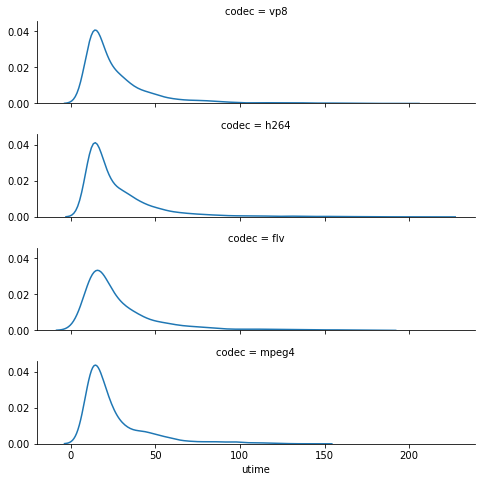

In [13]:
#observe distributions - 'codec'
g = sns.FacetGrid(df, row="codec", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "utime")


'''all seesm the same'''

'the only different distribution can be observed in category SHOW'

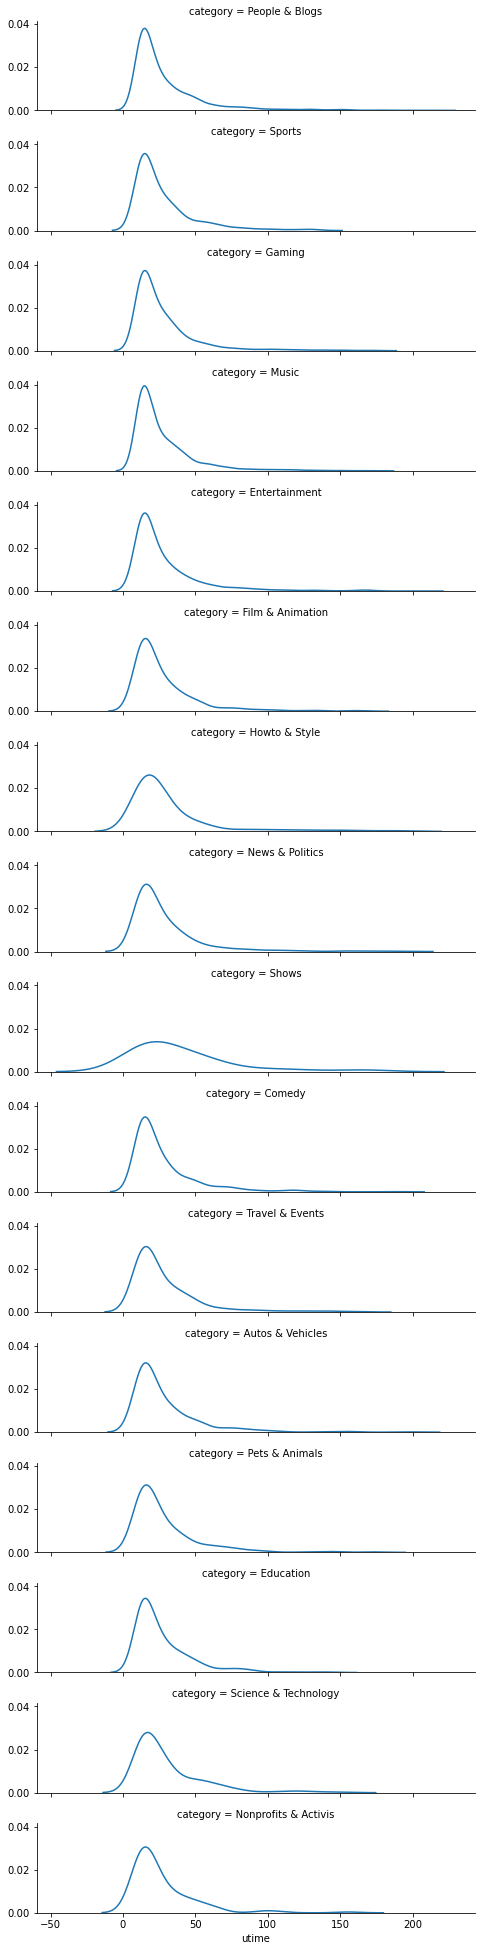

In [14]:
#observe distributions - 'category'

##all categories follow simillar patterns
g = sns.FacetGrid(df, row="category", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "utime")


'''the only different distribution can be observed in category SHOW'''

'simillar situtaion here'

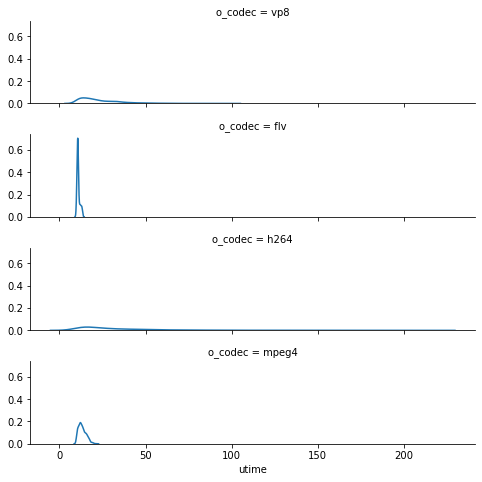

In [15]:
#observe distributions - 'o_codec'

##all categories follow simillar patterns
g = sns.FacetGrid(df, row="o_codec", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "utime")


'''simillar situtaion here'''

In [16]:
df_numerical.columns

Index(['duration', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b',
       'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_bitrate',
       'o_framerate', 'o_width', 'o_height', 'umem', 'utime'],
      dtype='object')

In [17]:
#not include licence type, Driving Licence! (and target)

dummies = pd.get_dummies(df_categorical,drop_first=True)

dummies.head()

,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,...,category_Nonprofits & Activis,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Travel & Events,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Numerical data

In [18]:
df_numerical.head(3)

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,645.84000,320,240,95903,25.032558,138,16008,0,16146,1081321,6660941,0,7742262,109000,29.97,1280,720,218932,15.929
1,326.58832,1920,1080,5999648,23.000000,174,7656,0,7830,16603953,228322925,0,244926878,820000,29.97,1920,1080,218932,10.417
2,473.00000,320,240,164017,25.000000,198,10924,704,11826,1419320,8047423,0,9697521,242000,24.00,1920,1080,645544,45.327


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bitrate'}>],
       [<AxesSubplot:title={'center':'framerate'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'frames'}>,
        <AxesSubplot:title={'center':'i_size'}>,
        <AxesSubplot:title={'center':'p_size'}>,
        <AxesSubplot:title={'center':'b_size'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'o_bitrate'}>,
        <AxesSubplot:title={'center':'o_framerate'}>,
        <AxesSubplot:title={'center':'o_width'}>],
       [<AxesSubplot:title={'center':'o_height'}>,
        <AxesSubplot:title={'center':'umem'}>,
        <AxesSubplot:title={'center':'utime'}>, <AxesSubplot:>]],
      dtype=object)

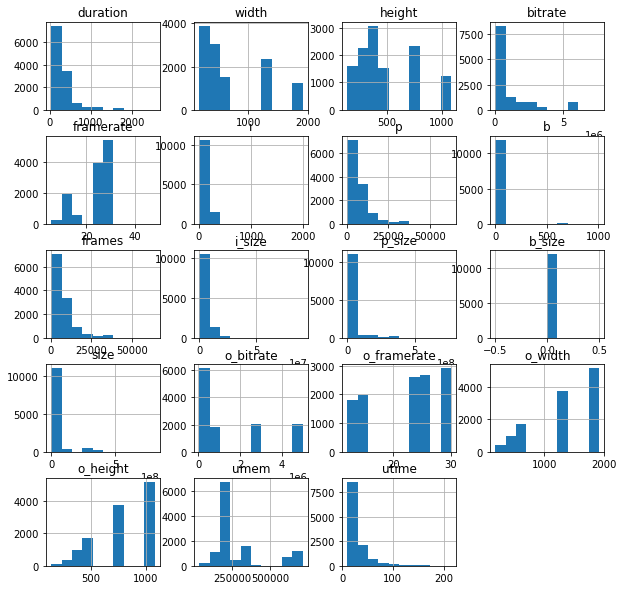

In [19]:
df_numerical.hist(figsize=(10,10),density=False)

In [20]:
'''all the variables we are gonna transform (log), since they are all very skewed''' #even the target!

'all the variables we are gonna transform (log), since they are all very skewed'

In [21]:
#logistic transformation
df_numerical= df_numerical.apply(lambda x: np.log10(x+1) if np.issubdtype(x.dtype, np.number) else x)
df_numerical.head()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,2.810797,2.506505,2.382017,4.981837,1.415517,2.143015,4.204364,0.000000,4.208092,6.033955,6.823536,0.0,6.888868,5.037430,1.490941,3.107549,2.857935,5.340311,1.228631
1,2.515328,3.283527,3.033826,6.778126,1.380211,2.243038,3.884059,0.000000,3.893817,7.220212,8.358550,0.0,8.389036,5.913814,1.490941,3.283527,3.033826,5.340311,1.057552
2,2.675778,2.506505,2.382017,5.214892,1.414973,2.298853,4.038421,2.848189,4.072875,6.152081,6.905657,0.0,6.986661,5.383817,1.397940,3.283527,3.033826,5.809927,1.665834
3,2.652802,3.107549,2.857935,6.312268,1.491393,1.968483,4.125481,0.000000,4.128464,6.960596,8.025104,0.0,8.061013,6.477121,1.204120,3.283527,3.033826,5.816356,2.016373
4,2.408715,2.506505,2.382017,5.398421,1.414973,2.045323,3.797475,0.000000,3.805025,5.786379,6.867754,0.0,6.902348,5.913814,1.414973,3.283527,3.033826,5.336101,1.202407


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bitrate'}>],
       [<AxesSubplot:title={'center':'framerate'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'frames'}>,
        <AxesSubplot:title={'center':'i_size'}>,
        <AxesSubplot:title={'center':'p_size'}>,
        <AxesSubplot:title={'center':'b_size'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'o_bitrate'}>,
        <AxesSubplot:title={'center':'o_framerate'}>,
        <AxesSubplot:title={'center':'o_width'}>],
       [<AxesSubplot:title={'center':'o_height'}>,
        <AxesSubplot:title={'center':'umem'}>,
        <AxesSubplot:title={'center':'utime'}>, <AxesSubplot:>]],
      dtype=object)

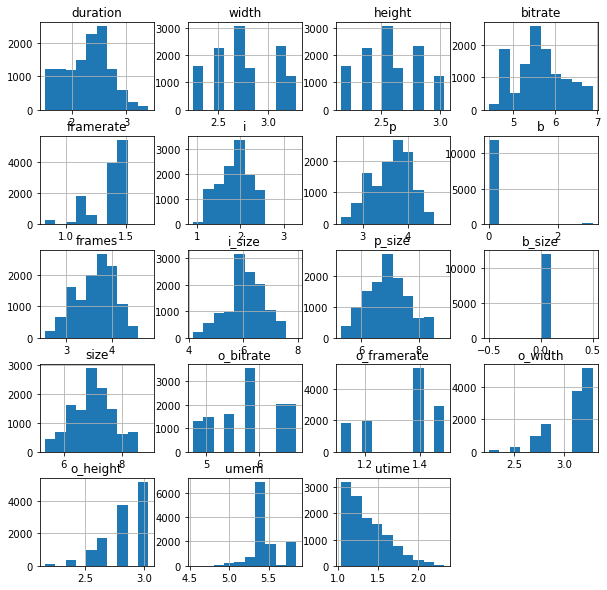

In [22]:
df_numerical.hist(figsize=(10,10),density=False)

In [23]:
'''overall much better looking distributions! But we are gonna remove the "b" and "b_size" cols cause they are non informative'''
df_numerical=df_numerical.drop(columns=['b','b_size'])
df_numerical.head()

,duration,width,height,bitrate,framerate,i,p,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,2.810797,2.506505,2.382017,4.981837,1.415517,2.143015,4.204364,4.208092,6.033955,6.823536,6.888868,5.037430,1.490941,3.107549,2.857935,5.340311,1.228631
1,2.515328,3.283527,3.033826,6.778126,1.380211,2.243038,3.884059,3.893817,7.220212,8.358550,8.389036,5.913814,1.490941,3.283527,3.033826,5.340311,1.057552
2,2.675778,2.506505,2.382017,5.214892,1.414973,2.298853,4.038421,4.072875,6.152081,6.905657,6.986661,5.383817,1.397940,3.283527,3.033826,5.809927,1.665834
3,2.652802,3.107549,2.857935,6.312268,1.491393,1.968483,4.125481,4.128464,6.960596,8.025104,8.061013,6.477121,1.204120,3.283527,3.033826,5.816356,2.016373
4,2.408715,2.506505,2.382017,5.398421,1.414973,2.045323,3.797475,3.805025,5.786379,6.867754,6.902348,5.913814,1.414973,3.283527,3.033826,5.336101,1.202407


In [24]:
#scale the numerical
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(df_numerical)
#scaled_df = pd.DataFrame(scaler.transform(df_numerical))
#scaled_df.columns = df_numerical.columns

#scaled_df.head()

In [25]:
#scaled boxplots for numerical
#df_numerical.boxplot()

In [26]:
#final df
df=pd.concat([dummies,df_numerical],axis=1)
df.head()

,codec_h264,codec_mpeg4,codec_vp8,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Music,...,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,0,0,1,0,0,0,0,0,0,0,...,4.208092,6.033955,6.823536,6.888868,5.037430,1.490941,3.107549,2.857935,5.340311,1.228631
1,1,0,0,0,0,0,0,0,0,0,...,3.893817,7.220212,8.358550,8.389036,5.913814,1.490941,3.283527,3.033826,5.340311,1.057552
2,1,0,0,0,0,0,0,0,0,0,...,4.072875,6.152081,6.905657,6.986661,5.383817,1.397940,3.283527,3.033826,5.809927,1.665834
3,0,0,1,0,0,0,0,1,0,0,...,4.128464,6.960596,8.025104,8.061013,6.477121,1.204120,3.283527,3.033826,5.816356,2.016373
4,0,0,0,0,0,0,0,0,0,1,...,3.805025,5.786379,6.867754,6.902348,5.913814,1.414973,3.283527,3.033826,5.336101,1.202407


In [27]:
#data separation 
y=df['utime']
X=df.drop(columns='utime')
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(8400, 37) (3600, 37)


## Modeling

## Linear regression. 

Linear regression can be summarized by this formula: $\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $.

#### Training  the model

Internally, *sklearn* uses a gradient descent algorithm to optimize the weights $\hat{\beta}$.

In [128]:
from sklearn.linear_model import LinearRegression

# Model initialization (not yet trained)
lr=LinearRegression()

# Training of the model. Internally the predictor will optimize the weights based on the data with which it is trained
lr.fit(X_train,y_train)

LinearRegression()

#### Testing the model

In [129]:
# These will be the predictions of my model on test data. These predictions are obtained through the weights calculated earlier in the training phase
y_pred=lr.predict(X_test)
# This array contains the respective prediction for each sample of the test set
y_pred

array([1.24822819, 1.24206557, 1.25477023, ..., 1.19217584, 1.50944608,
       1.06841139])

To evaluate the effectiveness of the model, the predictions must be compared with the real value that the relative sample.<br>
To do this we use two measures of effectiveness:
- *mean absolute error (MAE)*
- *mean squared error (MSE)*

###### Mean Absolute Error

${MAE} = \frac{1}{n} \sum \limits _{i=1} ^{n}  |y_i-f(x_{i})| $

In [130]:
from sklearn.metrics import mean_absolute_error

# sklearn automatically calculates the mae with a special function 
mae_test=mean_absolute_error(y_pred,y_test)
print(f'MAE on test data is {mae_test}')

MAE on test data is 0.09479913813535745


In [131]:
# Let's see how the error is distributed in the y range
performance_percent=print(f'Performance on the test: {(1-mae_test/(y.max()-y.min()))*100}%')

Performance on the test: 92.66247375035815%


###### Mean Squared Error

This measure of error weighs heavily on samples that have high errors.

${MSE} = \frac{1}{n} \sum \limits _{i=1} ^{n}  (y_i-f(x_{i}))^2 $

In [132]:
from sklearn.metrics import mean_squared_error

# sklearn automatically calculates the mse with a special function 
mse_test=mean_squared_error(y_pred,y_test)
print(f'MSE on test data is {mse_test}')

MSE on test data is 0.014065257832289428


In general we can say that the model predicts quite well, and that it does not make big errors on the data.

#### Feature importance

In [133]:
# let's look at the most important features of the model by going to see the value of its weights and ordering them
importance=lr.coef_
feature_importance=sorted(zip(X_test.columns,importance),key=lambda x:x[1])
feature_importance

[('size', -9.76999287269729),
 ('p', -0.38149654089305113),
 ('width', -0.10171055406227811),
 ('i_size', -0.09319750783327828),
 ('category_Sports', -0.021349458940399968),
 ('category_Education', -0.018189290082080936),
 ('category_Science & Technology', -0.017930068433291226),
 ('category_Nonprofits & Activis', -0.014574274794911109),
 ('category_Comedy', -0.010131214855070863),
 ('category_Entertainment', -0.00960096957131362),
 ('category_News & Politics', -0.008017894006650065),
 ('category_Music', -0.007725260895093939),
 ('codec_h264', -0.007097431294518381),
 ('category_Gaming', -0.00657623025035918),
 ('category_Film & Animation', -0.004715418828289249),
 ('category_Howto & Style', -0.0036487267044816906),
 ('category_Pets & Animals', -0.0029676353864934923),
 ('category_People & Blogs', -0.0029094103945678934),
 ('codec_mpeg4', -0.0010577793757349744),
 ('codec_vp8', 0.0043767542082596405),
 ('category_Travel & Events', 0.00710689705541163),
 ('category_Shows', 0.01929652879

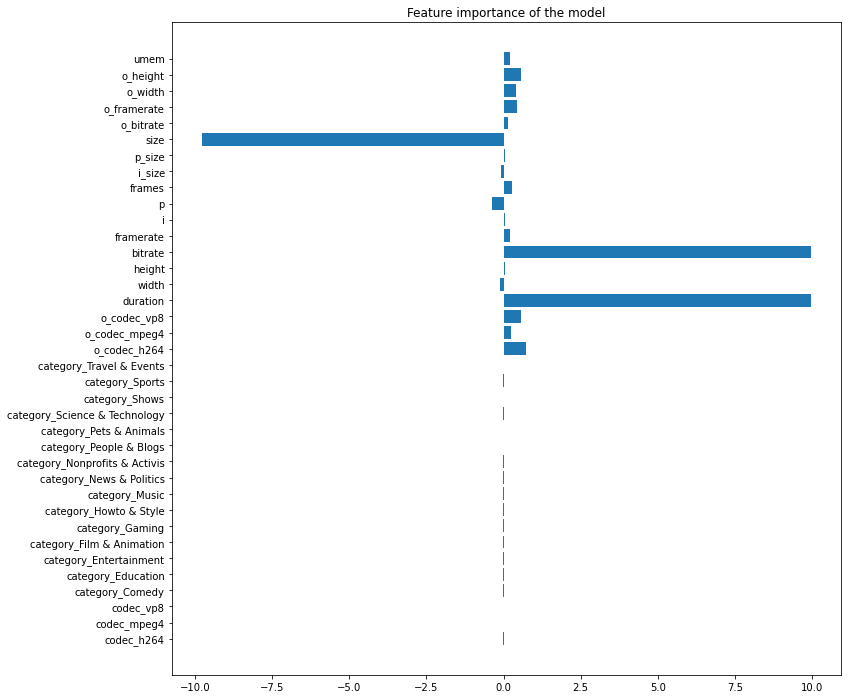

In [134]:
# Plot of the feature importance of the model
plt.figure(figsize=(12,12))
names=X_test.columns.tolist()
yvals=[x for x in range(len(feature_importance))]
plt.title('Feature importance of the model')
plt.barh(yvals, importance)
plt.yticks(yvals,names)
plt.show()

These features are the ones that contribute most to the calculation of the target from the model.

# DECISION TREE REGRESSOR

In [28]:
#DEFINE THE REGRESSOR and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeRegressor 
import numpy as np

regressor = DecisionTreeRegressor()
parameters = {"max_depth":[3,4,5], 
              "min_samples_leaf": [3,10]}


In [29]:
#DEFINE GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, scoring ='neg_mean_absolute_error') 
gs = gs.fit(X_train,y_train)

In [30]:
#summarizing the results 
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

gs.score(X_test, y_test)


***GRIDSEARCH RESULTS***
Best score: -0.094711 using {'max_depth': 5, 'min_samples_leaf': 10}
-0.126357 (0.004756) with: {'max_depth': 3, 'min_samples_leaf': 3}
-0.126357 (0.004756) with: {'max_depth': 3, 'min_samples_leaf': 10}
-0.107674 (0.002565) with: {'max_depth': 4, 'min_samples_leaf': 3}
-0.107674 (0.002565) with: {'max_depth': 4, 'min_samples_leaf': 10}
-0.094823 (0.002046) with: {'max_depth': 5, 'min_samples_leaf': 3}
-0.094711 (0.002076) with: {'max_depth': 5, 'min_samples_leaf': 10}


-0.09632870390419213

In [31]:
error_train=gs.predict(X_train)-y_train
error_test=gs.predict(X_test)-y_test

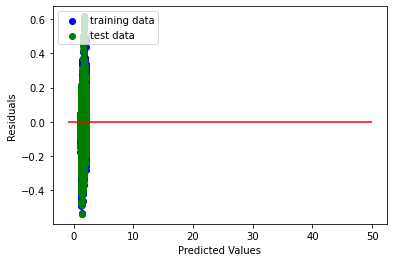

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

In [33]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  0.093446376640651
MSE train:  0.014912543213844992
RMSE train:  0.12211692435467326
r2:  0.8809565344611876
MAE test:  0.09632870390419213
MSE test:  0.01613255976243665
RMSE test:  0.12701401403954074
r2:  0.8707326813862745


# RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
import numpy as np

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mae'], 
              "max_depth":[2,10], "min_samples_leaf": [0.1,0.3]}

gs = GridSearchCV(regressor, parameters, scoring='f1', cv=3) 

In [36]:
#DEFINE REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

regressor = RandomForestRegressor()
parameters = {"n_estimators":[5,10,100], "criterion": ['mse'], 
              "min_samples_leaf": [0.1,0.3], "random_state" : [42]}

#DEFINE  GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(X_train,y_train)

#summarize the results of  GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.

gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.510218 using {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 100, 'random_state': 42}
0.503986 (0.025808) with: {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 5, 'random_state': 42}
0.505150 (0.028487) with: {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 10, 'random_state': 42}
0.510218 (0.013289) with: {'criterion': 'mse', 'min_samples_leaf': 0.1, 'n_estimators': 100, 'random_state': 42}
0.191964 (0.004160) with: {'criterion': 'mse', 'min_samples_leaf': 0.3, 'n_estimators': 5, 'random_state': 42}
0.192805 (0.005581) with: {'criterion': 'mse', 'min_samples_leaf': 0.3, 'n_estimators': 10, 'random_state': 42}
0.192505 (0.006018) with: {'criterion': 'mse', 'min_samples_leaf': 0.3, 'n_estimators': 100, 'random_state': 42}


0.5104054020100196

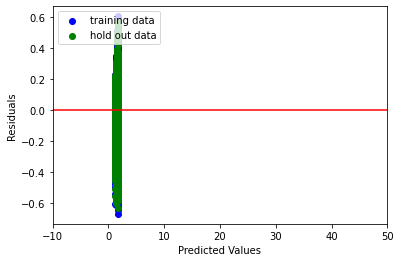

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [38]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  0.14018327073942297
MSE train:  0.03138215460858745
RMSE train:  0.17715009062540005
r2:  0.7271788371087593
MAE test:  0.14149002043744816
MSE test:  0.032661748188325304
RMSE test:  0.1807256157503006
r2:  0.7144266246508592


In [39]:
columns = X.columns

In [40]:
from sklearn import tree
r = tree.export_text(gs.best_estimator_.estimators_[40],feature_names=columns.tolist(), max_depth=3)
print(r)


|--- umem <= 5.51
|   |--- o_width <= 2.96
|   |   |--- value: [1.21]
|   |--- o_width >  2.96
|   |   |--- o_codec_vp8 <= 0.50
|   |   |   |--- value: [1.27]
|   |   |--- o_codec_vp8 >  0.50
|   |   |   |--- value: [1.37]
|--- umem >  5.51
|   |--- value: [1.67]



In [41]:
from sklearn import tree
tree.export_graphviz(gs.best_estimator_.estimators_[0], out_file='tree_from_forest.dot',feature_names=columns.tolist(),max_depth=4)

In [42]:
!dot -Tpng tree_from_forest.dot -o tree_from_forest.png -Gdpi=600

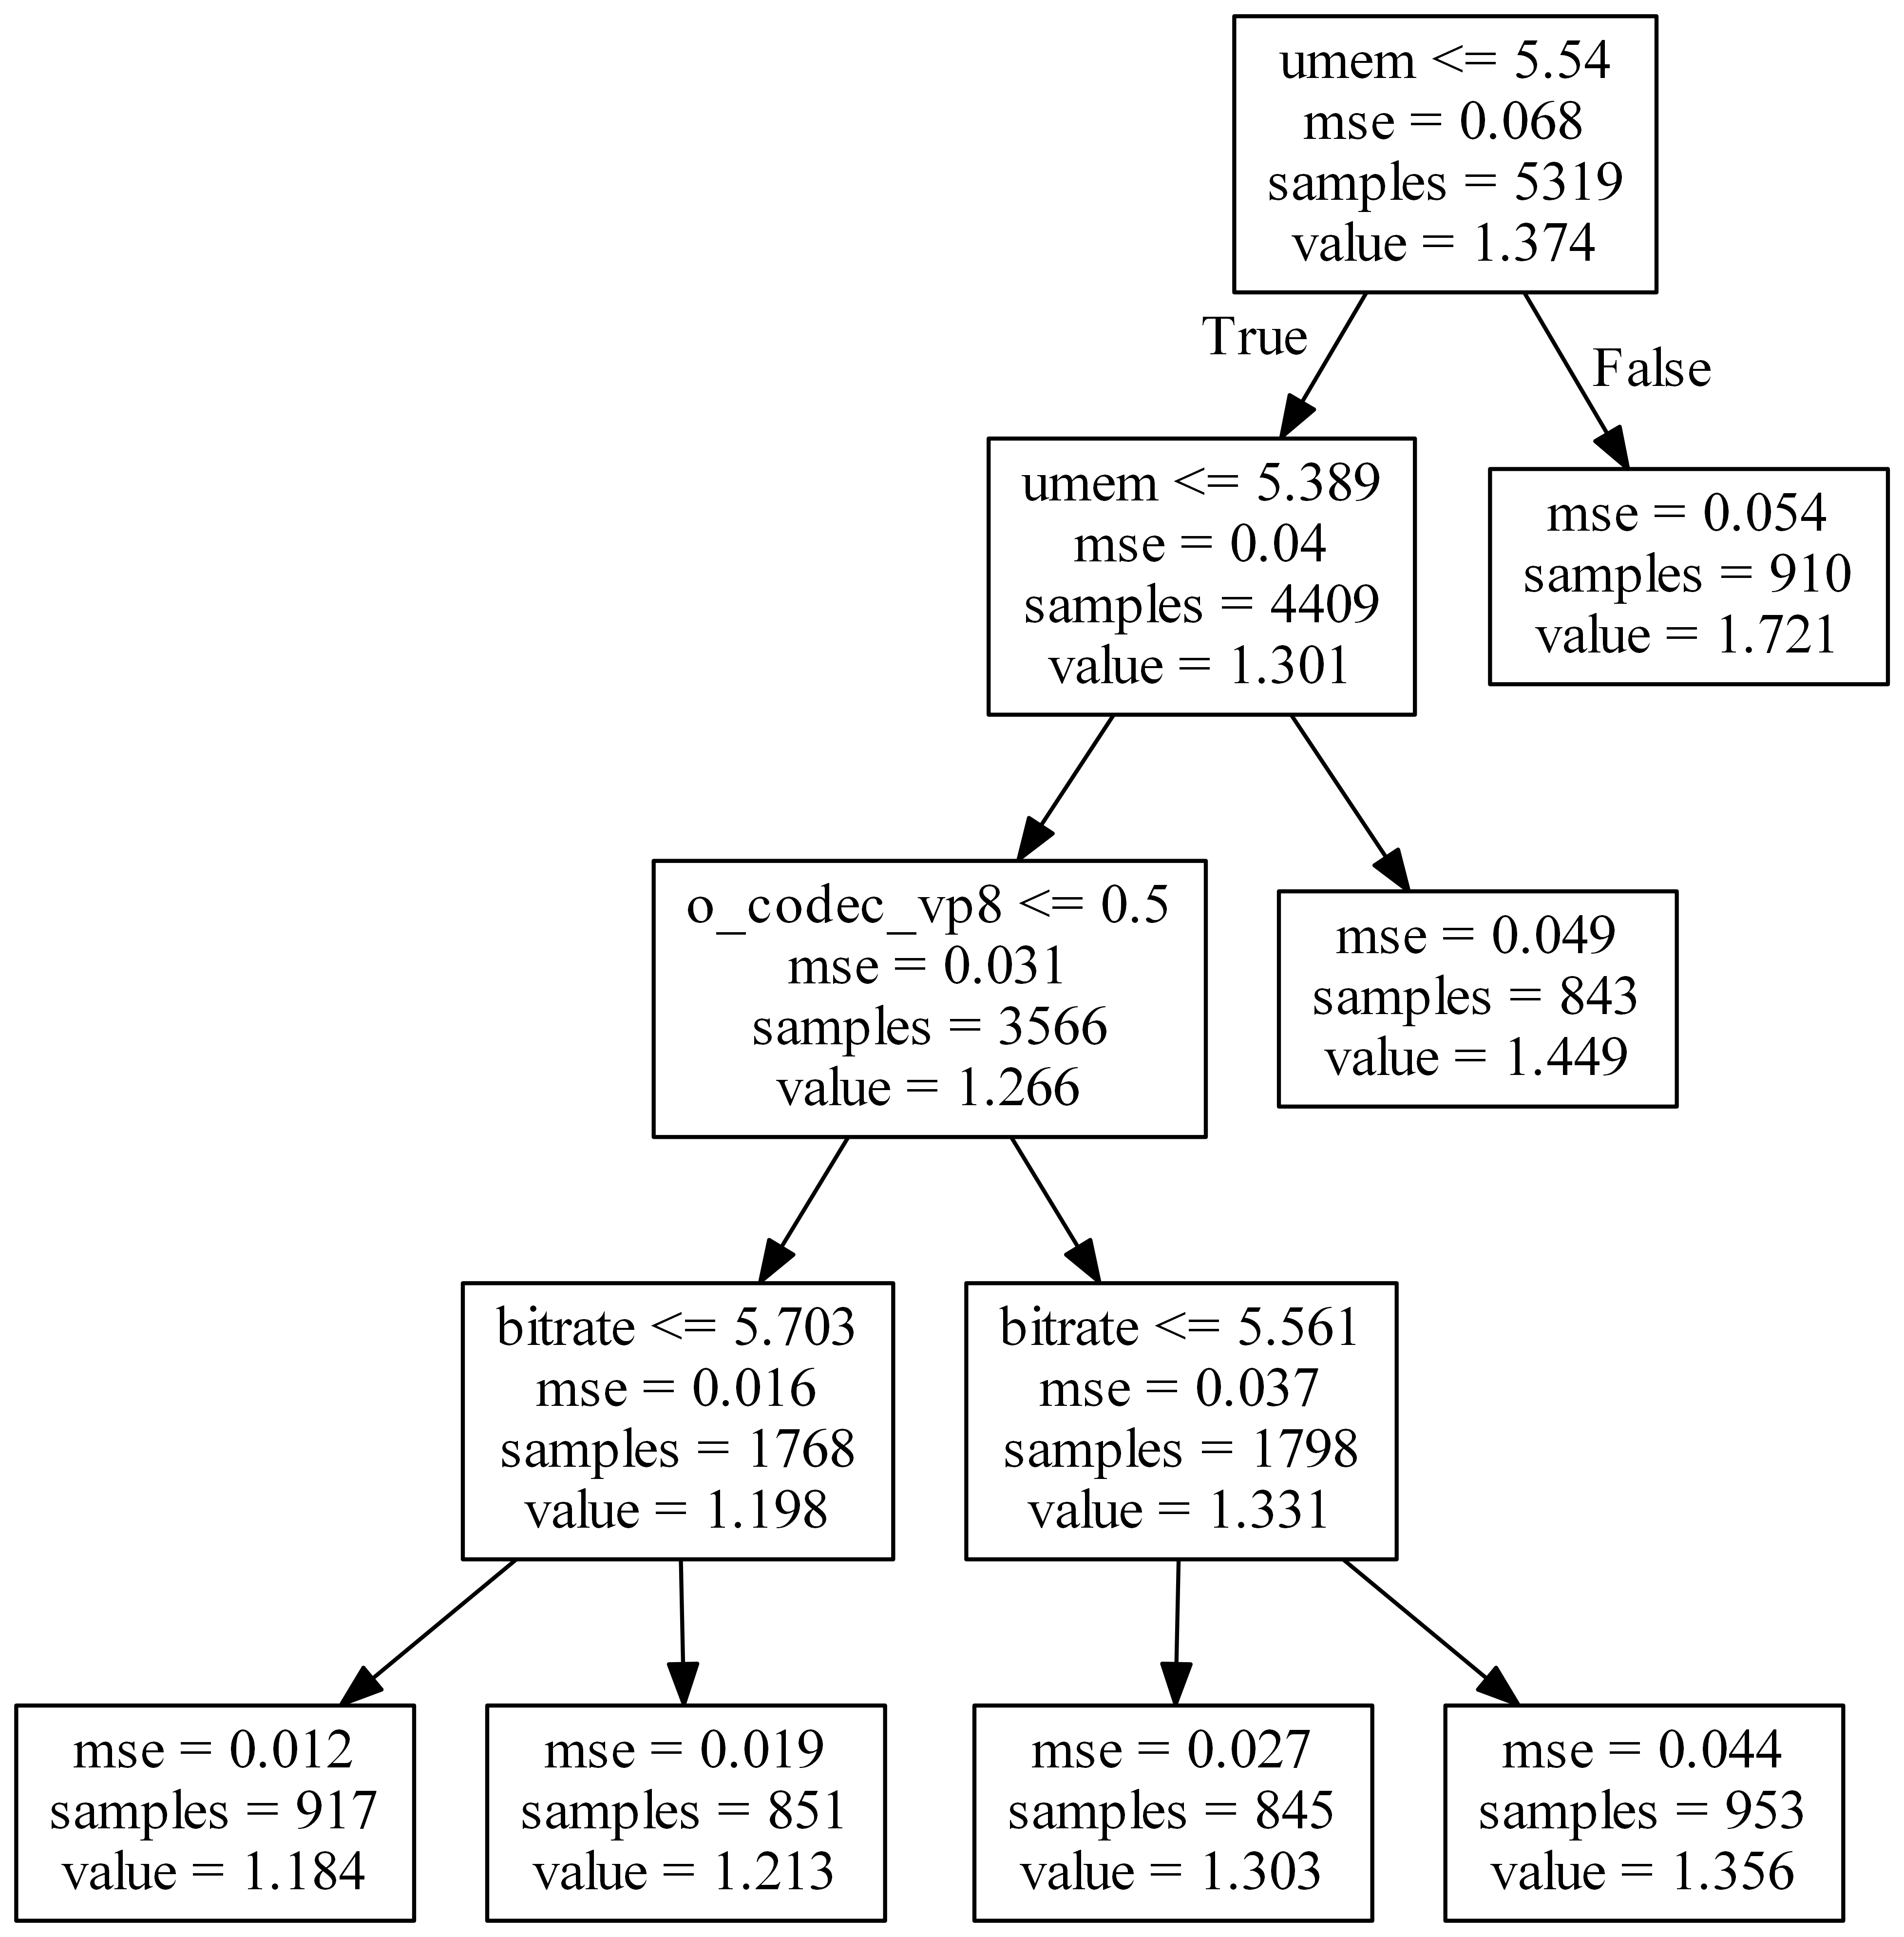

In [43]:
from IPython.display import Image
Image(filename = 'tree_from_forest.png')